In [1]:
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
import requests
from urllib.request import urlopen
import collections
from urllib.parse import urljoin
import seaborn as sns
import matplotlib.pyplot as plt
from multiprocessing import Pool
from concurrent.futures import ThreadPoolExecutor

### Test code to see. number of pages

In [2]:
#first_url = 'https://www.monster.com/jobs/search/?q=data-scientist&where=New-York'
#url = first_url + str('&stpage=1&page=10')
#response = requests.get(url)
#soup_page = BeautifulSoup(response.text, 'html.parser')
#pa = soup_page.find_all('header', attrs={'class': 'title'})
#num = re.findall(r'\b\d+\b', str(pa))
#num_job = int(" ".join(num))
#pages = round(num_job/30,0)

### Function used

In [3]:
def count_in(x):
    if len(x) == 0:
        return(0)
    else:
        return(1)
    
def get_urls(x):
    url = x
    url = url + str('&stpage=1&page=10')
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    all_listings = soup.find_all('section', attrs={'data-jobid': True})
    ids = [item['data-jobid'] for item in all_listings]
    new_urls = [x.find('h2', attrs={'class': 'title'}).find('a', href=True)['href'] for x in all_listings]
    return(new_urls)

def to_df(x):
    lang = ["C","C++","Java","Javascript","Python","R","SQL","Hadoop","Hive","Pig","Spark","AWS","Tableau",
            'SAS', 'Excel']
    df2 = pd.DataFrame(x, columns = lang)
    df2.reset_index(inplace = True)
    df2.drop('index', inplace = True, axis = 1)
    df3 = df2.sum(axis = 0)
    df4 = pd.DataFrame(df3, columns = ['Count'])
    df4.reset_index(inplace = True)
    df4.rename({'index': 'language'}, inplace = True, axis = 1)
    t_job = len(df2)
    return(df2, df4, t_job)

def plot_count(x,total, title):
    sns.set()
    print('Number of Jobs:', total)
    print(x)
    fig = plt.figure(figsize = (16,8))
    sns.barplot(x='language', y='Count', data=x).set_title(title,fontsize=20)
    plt.xticks(rotation=45, fontsize = 13)
    plt.xlabel('Skill',fontsize=15)
    plt.ylabel('Count',fontsize=15)
    ax = plt.gca()
    for nr, p in enumerate(ax.patches):
        height = round(p.get_height(),0)
        ax.text(nr, height + 1.5,'{}'.format(int(height)), color='black',fontsize=15,  ha='center', va='center')
        

In [4]:
def get_count(x,ll):
    sum_C = 0
    sum_Cplus = 0
    sum_java = 0
    sum_javascript = 0
    sum_r = 0
    sum_sql = 0
    sum_hadoop = 0
    sum_hive = 0
    sum_pig = 0
    sum_spark = 0
    sum_aws = 0 
    sum_tableau = 0
    sum_sas= 0 
    sum_ex = 0 
    sum_py = 0
    job_url = x
    response = requests.get(job_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    desc = soup.find('div', attrs={'id': 'JobDescription'})

    C = re.findall(r'[\b\s\/]C\b[\/\s,]', str(desc))
    C2 = count_in(C)
    sum_C = sum_C + C2

    c_plus = re.findall(r'[\b\/\s]?C\+\+[\s,]?', str(desc))
    c_plus2 = count_in(c_plus)
    sum_Cplus = sum_Cplus + c_plus2

    java = re.findall(r'[\/\b\s]?Java[\b,\/]?', str(desc))
    java2 = count_in(java)
    sum_java = sum_java + java2

    javascript = re.findall(r'[\/\s\b]Java[Ss]cript[\/\b\s,]?', str(desc))
    javascript2 = count_in(javascript)
    sum_javascript = sum_javascript + javascript2

    python = re.findall(r'[\/\b]?[Pp]ython[\s\/,]?', str(desc))
    python2 = count_in(python)
    sum_py = sum_py + python2

    R = re.findall(r'[\s\/\b]?R[\b\s\/,]', str(desc))
    R2 = count_in(R)
    sum_r = sum_r + R2

    sql = re.findall(r'[\/\b]?SQL[\s\/,]?', str(desc))
    sql2 = count_in(sql)
    sum_sql = sum_sql + sql2

    hadoop = re.findall(r'[\/\b]?Hadoop[\s\/,]?', str(desc))
    hadoop2 = count_in(hadoop)
    sum_hadoop = sum_hadoop + hadoop2

    hive = re.findall(r'[\/\b]?Hive[\s\/,]?', str(desc))
    hive2 = count_in(hive)
    sum_hive = sum_hive + hive2

    pig = re.findall(r'[\/\b]?Pig[\s\/,]?', str(desc))
    pig2 = count_in(pig)
    sum_pig = sum_pig + pig2

    spark = re.findall(r'[\/\b]?Spark[\s\/,]?', str(desc))
    spark2 = count_in(spark)
    sum_spark = sum_spark + spark2

    aws = re.findall(r'[\/\b]?AWS[\s\/,]?', str(desc))
    aws2 = count_in(aws)
    sum_aws = sum_aws + aws2

    tableau = re.findall(r'[\/\b\/]?Tableau[\s\/,]?', str(desc))
    tab2 = count_in(tableau)
    sum_tableau = sum_tableau + tab2

    sas = re.findall(r'[\/\b\/]?SAS[\s\/,]?', str(desc))
    sas2 = count_in(sas)
    sum_sas = sum_sas + sas2

    excel = re.findall(r'[\/\b\/]?[Ee]xcel[\s\/,]?', str(desc))
    ex2 = count_in(excel)
    sum_ex = sum_ex + ex2

    df =[sum_C,sum_Cplus,sum_java,sum_javascript,sum_py,sum_r,sum_sql,
                            sum_hadoop,sum_hive,sum_pig,sum_spark,sum_aws,sum_tableau,sum_sas, sum_ex]
    ll.append(df)

### Nationwide

### Code to see that Access is denied after scraping about 1,000 jobs

In [28]:
new_urls = get_urls('https://www.monster.com/jobs/search/?q=data-scientist')
response = requests.get(new_urls[1])
soup = BeautifulSoup(response.text, 'html.parser')
soup
#desc = soup.find('div', attrs={'id': 'JobDescription'})
#count_list = []
#get_count(new_urls[19], count_list)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>403 - Forbidden: Access is denied.</title>
<style type="text/css">
<!--
body{margin:0;font-size:.7em;font-family:Verdana, Arial, Helvetica, sans-serif;background:#EEEEEE;}
fieldset{padding:0 15px 10px 15px;} 
h1{font-size:2.4em;margin:0;color:#FFF;}
h2{font-size:1.7em;margin:0;color:#CC0000;} 
h3{font-size:1.2em;margin:10px 0 0 0;color:#000000;} 
#header{width:96%;margin:0 0 0 0;padding:6px 2% 6px 2%;font-family:"trebuchet MS", Verdana, sans-serif;color:#FFF;
background-color:#555555;}
#content{margin:0 0 0 2%;position:relative;}
.content-container{background:#FFF;width:96%;margin-top:8px;padding:10px;position:relative;}
-->
</style>
</head>
<body>
<div id="header"><h1>Server Error</h1></div>
<div id="content">
<div class="content-container"><fieldset>

Number of Jobs: 255
      language  Count
0            C      0
1          C++      0
2         Java      0
3   Javascript      0
4       Python      0
5            R      0
6          SQL      0
7       Hadoop      0
8         Hive      0
9          Pig      0
10       Spark      0
11         AWS      0
12     Tableau      0
13         SAS      0
14       Excel      0
CPU times: user 5.59 s, sys: 913 ms, total: 6.5 s
Wall time: 5.25 s


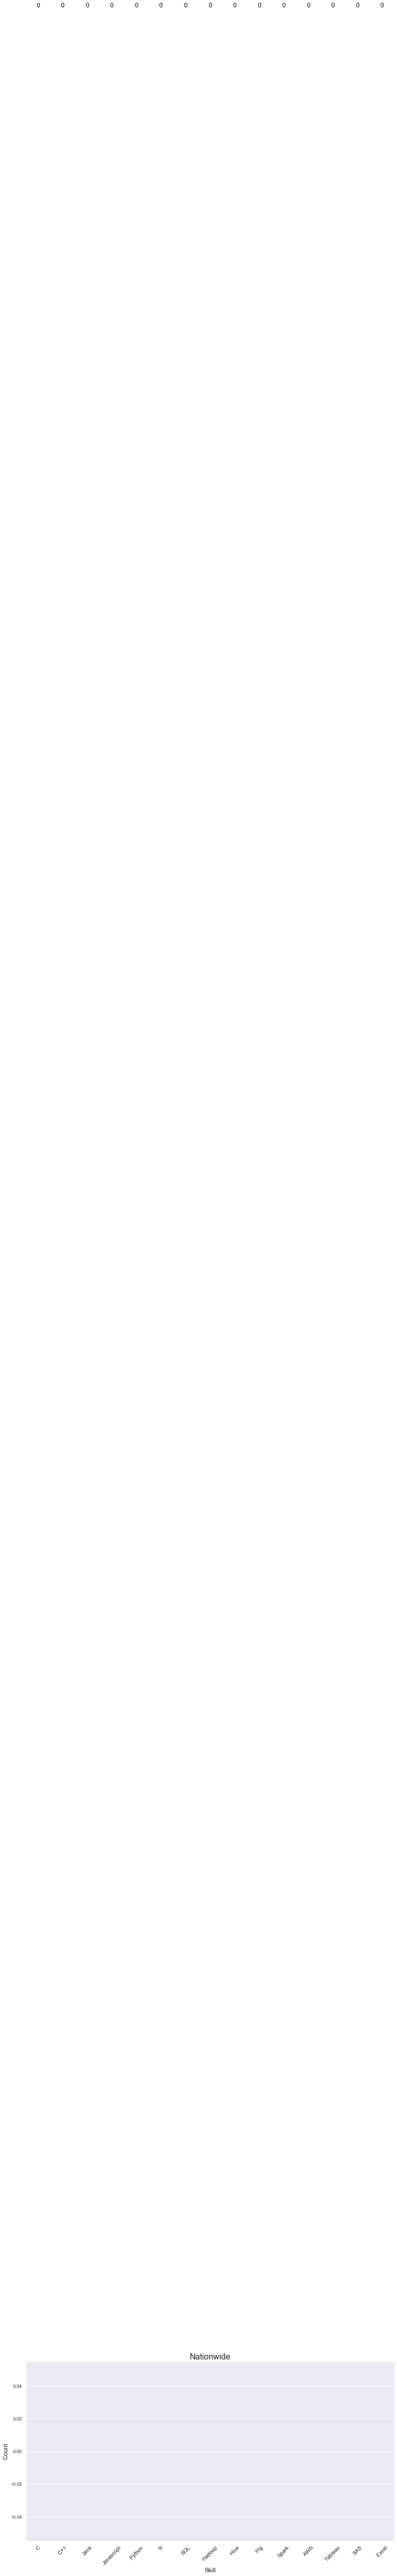

In [19]:
%%time

new_urls = get_urls('https://www.monster.com/jobs/search/?q=data-scientist')
processes = []
count_list = []

with ThreadPoolExecutor(max_workers=10) as executor:
    for url in new_urls:
        processes.append(executor.submit(get_count,url,count_list))
        
nw , nw_count, nw_total = to_df(count_list)
plot_count(nw_count, nw_total, 'Nationwide')

### New York City

Number of Jobs: 251
      language  Count
0            C      0
1          C++      0
2         Java      0
3   Javascript      0
4       Python      0
5            R      0
6          SQL      0
7       Hadoop      0
8         Hive      0
9          Pig      0
10       Spark      0
11         AWS      0
12     Tableau      0
13         SAS      0
14       Excel      0
CPU times: user 5.63 s, sys: 956 ms, total: 6.58 s
Wall time: 5.12 s


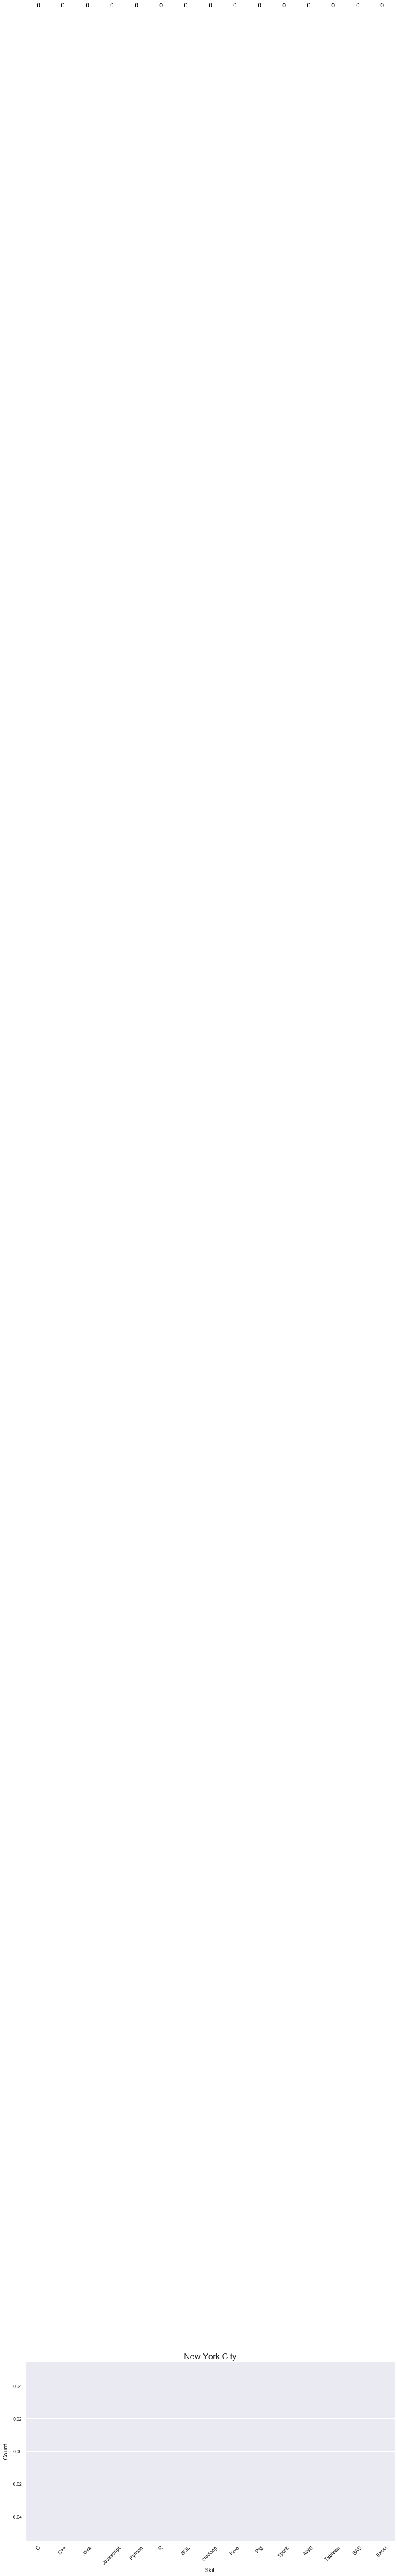

In [17]:
%%time

new_urls = get_urls('https://www.monster.com/jobs/search/?q=data-scientist&where=New-York__2Cny')
processes = []
count_list = []

with ThreadPoolExecutor(max_workers=10) as executor:
    for url in new_urls:
        processes.append(executor.submit(get_count,url,count_list))
        
ny , ny_count, ny_total = to_df(count_list)
plot_count(ny_count, ny_total, 'New York City')

### Washington DC

Number of Jobs: 259
      language  Count
0            C      0
1          C++      0
2         Java      0
3   Javascript      0
4       Python      0
5            R      0
6          SQL      0
7       Hadoop      0
8         Hive      0
9          Pig      0
10       Spark      0
11         AWS      0
12     Tableau      0
13         SAS      0
14       Excel      0
CPU times: user 5.77 s, sys: 811 ms, total: 6.58 s
Wall time: 8.67 s


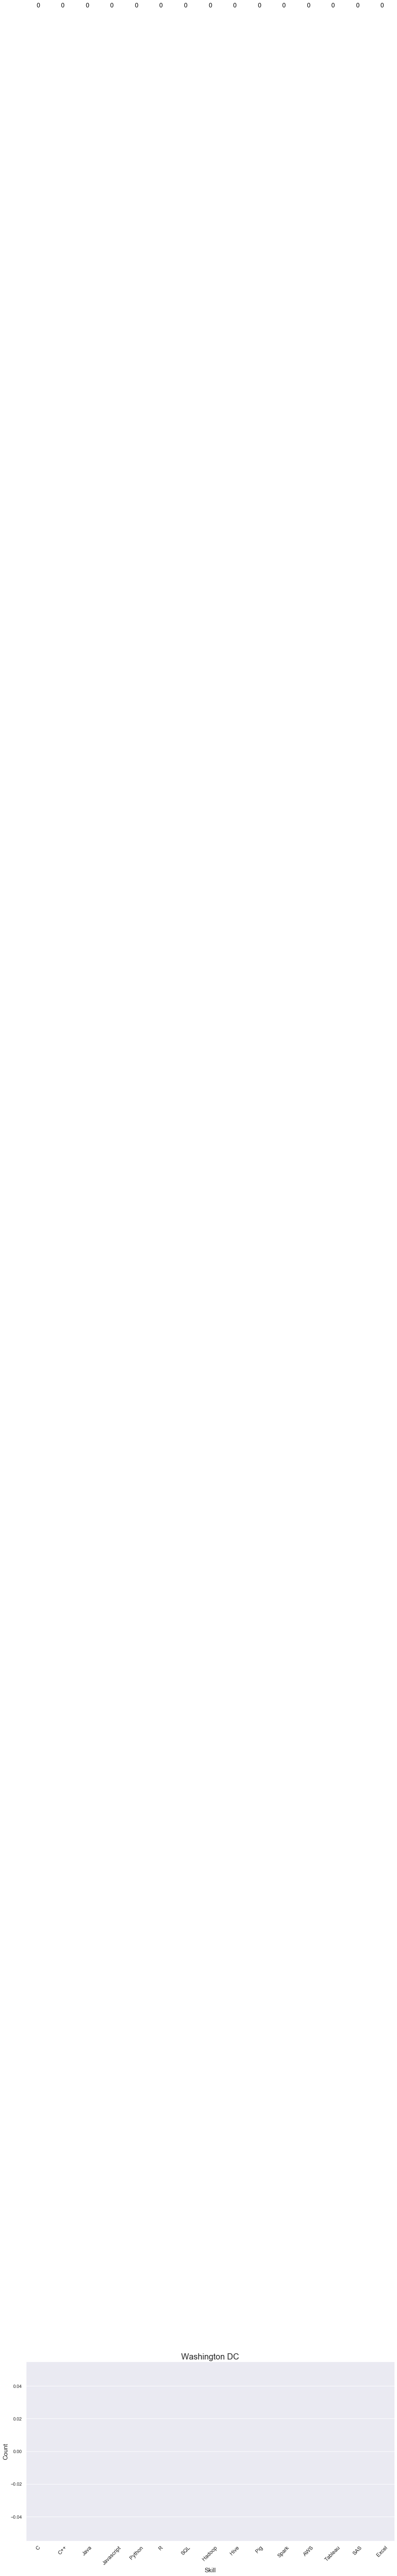

In [18]:
%%time

new_urls = get_urls('https://www.monster.com/jobs/search/?q=data-scientist&where=Washington__2C-DC')
processes = []
count_list = []

with ThreadPoolExecutor(max_workers=10) as executor:
    for url in new_urls:
        processes.append(executor.submit(get_count,url,count_list))
        
dc , dc_count, dc_total = to_df(count_list)
plot_count(dc_count, dc_total, 'Washington DC')

### San Francisco

Number of Jobs: 251
      language  Count
0            C      0
1          C++      0
2         Java      0
3   Javascript      0
4       Python      0
5            R      0
6          SQL      0
7       Hadoop      0
8         Hive      0
9          Pig      0
10       Spark      0
11         AWS      0
12     Tableau      0
13         SAS      0
14       Excel      0
CPU times: user 5.46 s, sys: 916 ms, total: 6.38 s
Wall time: 4.97 s


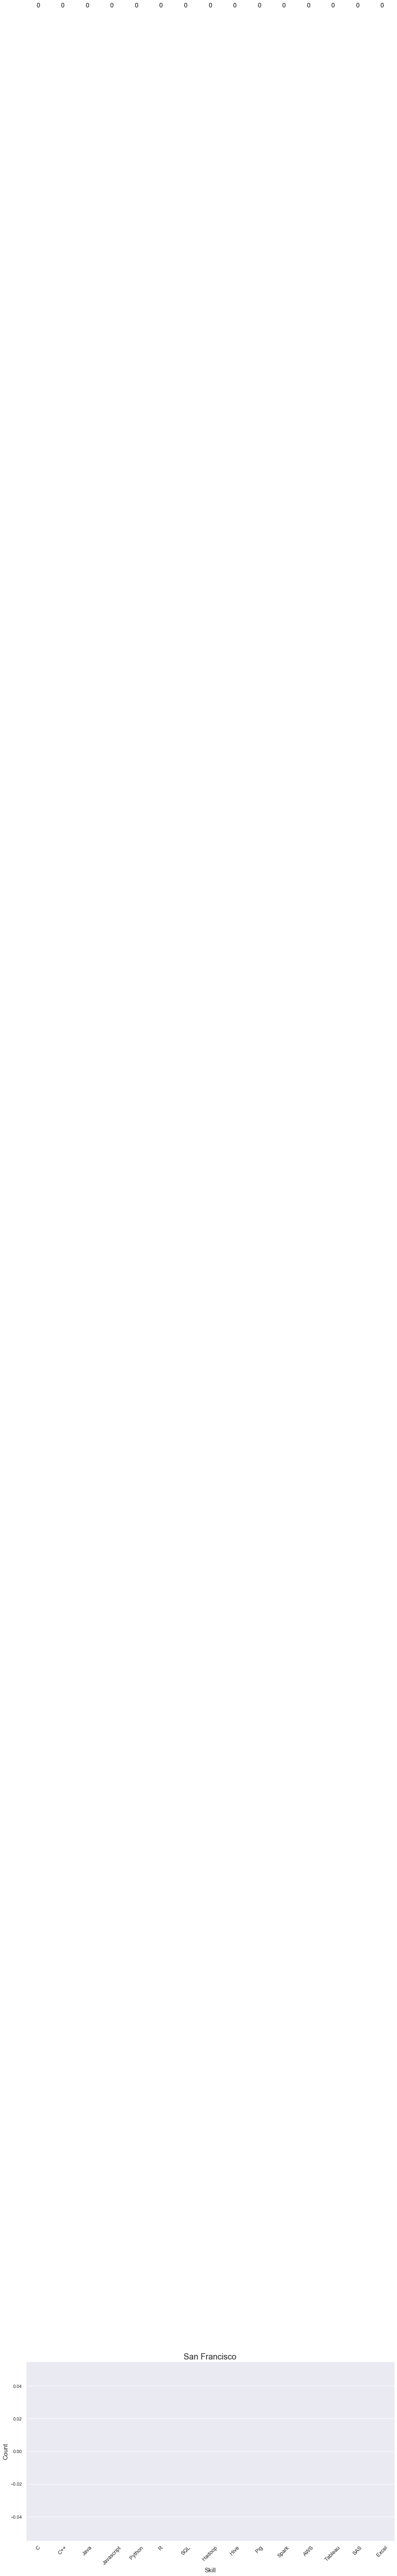

In [16]:
%%time

new_urls = get_urls('https://www.monster.com/jobs/search/?q=data-scientist&where=San-Francisco__2C-CA')
processes = []
count_list = []

with ThreadPoolExecutor(max_workers=10) as executor:
    for url in new_urls:
        processes.append(executor.submit(get_count,url,count_list))
        
sf , sf_count, sf_total = to_df(count_list)
plot_count(sf_count, sf_total, 'San Francisco')

### Chicago

Number of Jobs: 251
      language  Count
0            C      0
1          C++      0
2         Java      0
3   Javascript      0
4       Python      0
5            R      0
6          SQL      0
7       Hadoop      0
8         Hive      0
9          Pig      0
10       Spark      0
11         AWS      0
12     Tableau      0
13         SAS      0
14       Excel      0
CPU times: user 5.59 s, sys: 1.05 s, total: 6.64 s
Wall time: 5.18 s


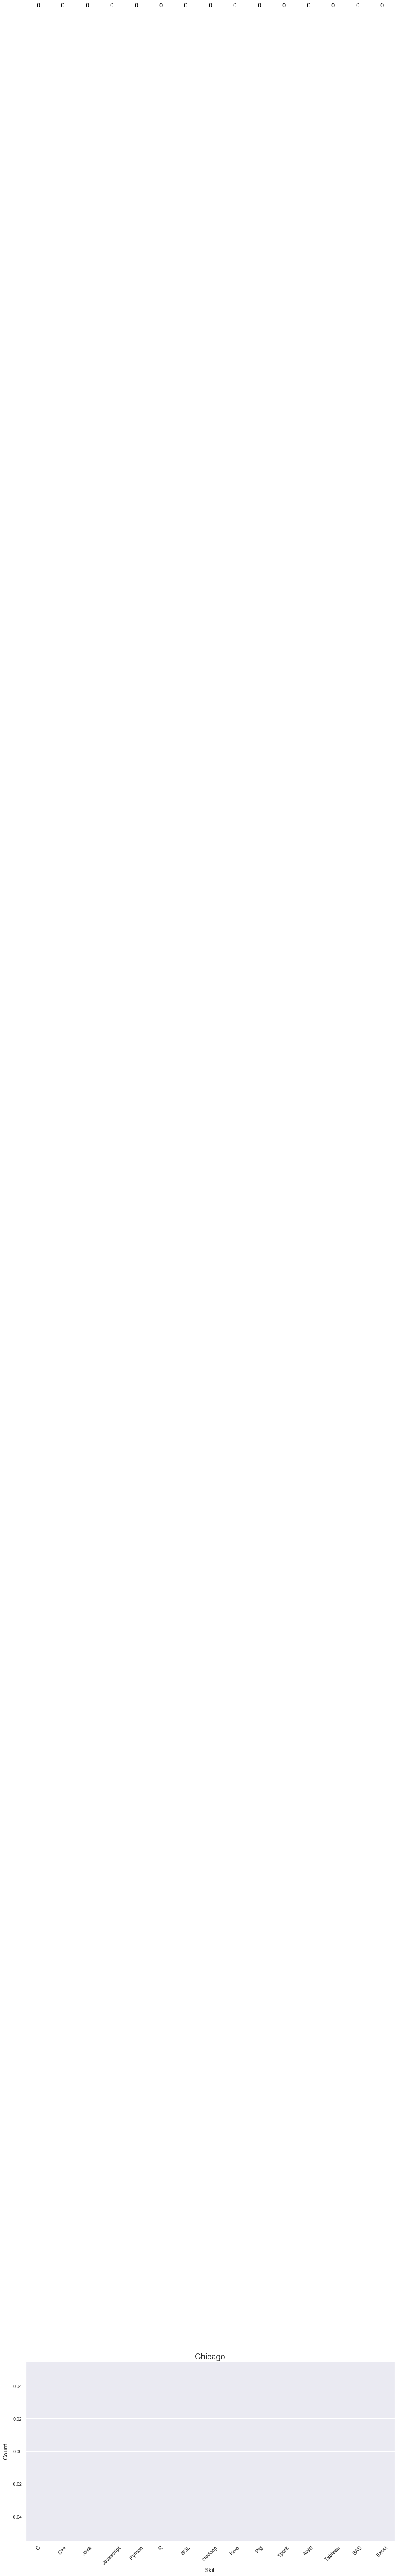

In [15]:
%%time

new_urls = get_urls('https://www.monster.com/jobs/search/?q=data-scientist&where=Chicago__2C-IL')
processes = []
count_list = []

with ThreadPoolExecutor(max_workers=10) as executor:
    for url in new_urls:
        processes.append(executor.submit(get_count,url,count_list))
        
chi , chi_count, chi_total = to_df(count_list)
plot_count(chi_count, chi_total, 'Chicago')

### Austin

Number of Jobs: 185
      language  Count
0            C      0
1          C++      0
2         Java      0
3   Javascript      0
4       Python      0
5            R      0
6          SQL      0
7       Hadoop      0
8         Hive      0
9          Pig      0
10       Spark      0
11         AWS      0
12     Tableau      0
13         SAS      0
14       Excel      0
CPU times: user 4.05 s, sys: 694 ms, total: 4.74 s
Wall time: 3.62 s


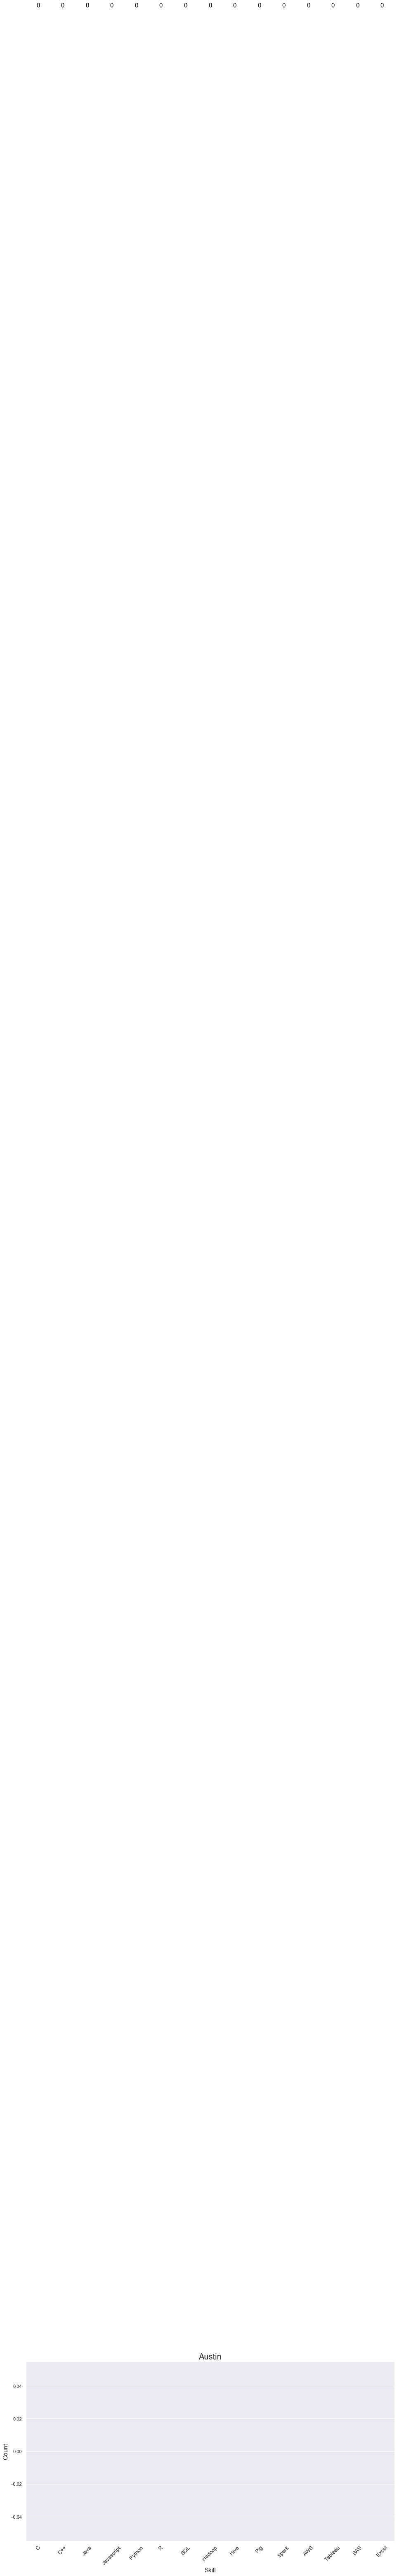

In [14]:
%%time

new_urls = get_urls('https://www.monster.com/jobs/search/?q=data-scientist&where=Austin__2C-TX')
processes = []
count_list = []

with ThreadPoolExecutor(max_workers=10) as executor:
    for url in new_urls:
        processes.append(executor.submit(get_count,url,count_list))
        
aus , aus_count, aus_total = to_df(count_list)
plot_count(aus_count, aus_total, 'Austin')

### Denver

Number of Jobs: 173
      language  Count
0            C      0
1          C++      0
2         Java      0
3   Javascript      0
4       Python      0
5            R      0
6          SQL      0
7       Hadoop      0
8         Hive      0
9          Pig      0
10       Spark      0
11         AWS      0
12     Tableau      0
13         SAS      0
14       Excel      0
CPU times: user 3.85 s, sys: 648 ms, total: 4.5 s
Wall time: 3.6 s


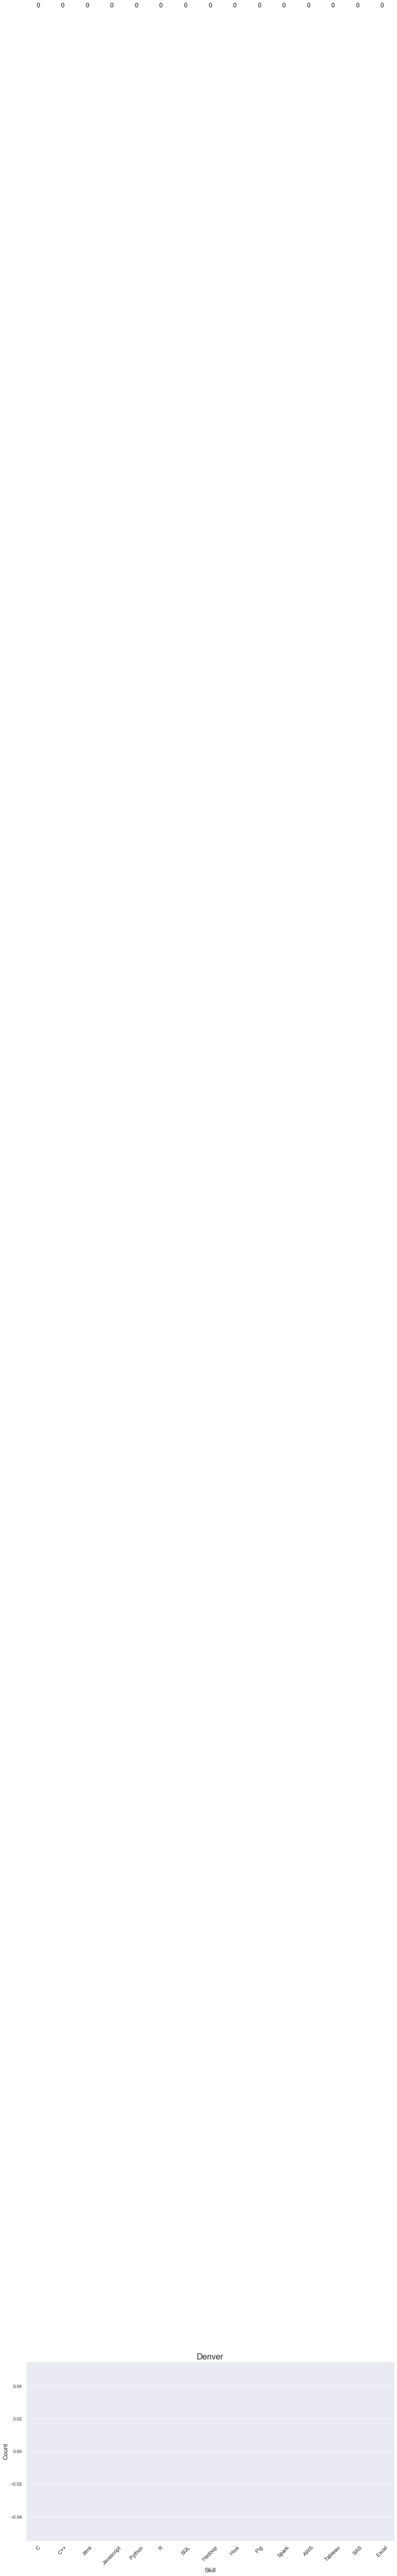

In [13]:
%%time

new_urls = get_urls('https://www.monster.com/jobs/search/?q=data-scientist&where=Denver__2C-CO')
processes = []
count_list = []

with ThreadPoolExecutor(max_workers=10) as executor:
    for url in new_urls:
        processes.append(executor.submit(get_count,url,count_list))
        
den , den_count, den_total = to_df(count_list)
plot_count(den_count, den_total, 'Denver')